In [1]:
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV

In [2]:
x_train_df = pd.read_csv('x_train.csv')
y_train_df = pd.read_csv('y_train.csv')
x_test_df = pd.read_csv('x_test.csv')

In [3]:
tr_text_list = x_train_df['text'].values.tolist()
te_text_list = x_test_df['text'].values.tolist()

In [4]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(tr_text_list)
X_test_counts = vectorizer.transform(te_text_list)
# X_train_counts.shape

In [5]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Logistic Regression

In [106]:
param_grid = [
  {'C': np.logspace(-9, 6, 31)}]

In [107]:
lrm = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=10, return_train_score=True ).fit(X_train_tfidf, y_train_df.values.ravel())

In [108]:
pd.DataFrame(lrm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002618,0.000626,0.000389,0.000077,1e-09,{'C': 1e-09},0.787500,0.820833,0.775000,0.758333,...,0.850926,0.840278,0.842593,0.834259,0.855556,0.846296,0.851389,0.843981,0.846111,0.005860
1,0.002523,0.001115,0.000336,0.000147,3.16228e-09,{'C': 3.1622776601683795e-09},0.787500,0.820833,0.775000,0.758333,...,0.850926,0.840278,0.842593,0.834259,0.855556,0.846296,0.851389,0.843981,0.846111,0.005860
2,0.001744,0.000344,0.000235,0.000026,1e-08,{'C': 1e-08},0.787500,0.820833,0.775000,0.758333,...,0.850926,0.840278,0.842593,0.834259,0.855556,0.846296,0.851389,0.843981,0.846111,0.005860
3,0.001593,0.000041,0.000217,0.000006,3.16228e-08,{'C': 3.162277660168379e-08},0.787500,0.820833,0.775000,0.758333,...,0.850926,0.840278,0.842593,0.834259,0.855556,0.846296,0.851389,0.843981,0.846111,0.005860
4,0.001621,0.000055,0.000222,0.000007,1e-07,{'C': 1e-07},0.787500,0.820833,0.775000,0.758333,...,0.850926,0.840278,0.842593,0.834259,0.855556,0.846296,0.851389,0.843981,0.846111,0.005860
5,0.001677,0.000123,0.000228,0.000022,3.16228e-07,{'C': 3.162277660168379e-07},0.787500,0.820833,0.775000,0.758333,...,0.850926,0.840278,0.842593,0.834259,0.855556,0.846296,0.851389,0.843981,0.846111,0.005860
6,0.001834,0.000170,0.000265,0.000052,1e-06,{'C': 1e-06},0.787500,0.820833,0.775000,0.758333,...,0.850926,0.840278,0.842593,0.834259,0.855556,0.846296,0.851389,0.843981,0.846111,0.005860
7,0.001612,0.000044,0.000225,0.000015,3.16228e-06,{'C': 3.162277660168379e-06},0.787500,0.820833,0.775000,0.758333,...,0.850926,0.840278,0.842593,0.834259,0.855556,0.846296,0.851389,0.843981,0.846111,0.005860
8,0.001849,0.000101,0.000222,0.000017,1e-05,{'C': 1e-05},0.787500,0.820833,0.775000,0.758333,...,0.850926,0.840741,0.842593,0.834722,0.855093,0.845833,0.851852,0.843519,0.846065,0.005746
9,0.001962,0.000140,0.000226,0.000011,3.16228e-05,{'C': 3.1622776601683795e-05},0.787500,0.820833,0.775000,0.758333,...,0.850463,0.841204,0.842593,0.835185,0.856019,0.846759,0.851852,0.842130,0.846111,0.005783


In [109]:
print(lrm.cv_results_)

{'mean_fit_time': array([0.00261774, 0.00252304, 0.00174415, 0.00159316, 0.00162065,
       0.00167651, 0.00183423, 0.00161185, 0.0018486 , 0.00196218,
       0.00186298, 0.00214548, 0.00213075, 0.00197675, 0.00226831,
       0.00281353, 0.00274045, 0.00387721, 0.00819473, 0.00573001,
       0.00714982, 0.00978861, 0.01053052, 0.01296318, 0.01576452,
       0.01667299, 0.02090154, 0.02075644, 0.02047324, 0.01742229,
       0.01826954]), 'std_fit_time': array([6.26147637e-04, 1.11495622e-03, 3.44208301e-04, 4.12302592e-05,
       5.53291653e-05, 1.22588972e-04, 1.69815566e-04, 4.43272911e-05,
       1.00729928e-04, 1.40454487e-04, 2.70891038e-05, 3.73234063e-05,
       1.28858173e-04, 3.97189110e-05, 5.68225056e-05, 3.22780015e-05,
       4.99752925e-05, 5.45826851e-04, 2.22247376e-03, 7.50494602e-04,
       3.68134565e-04, 1.09262697e-03, 5.52989080e-04, 1.69749341e-03,
       7.42867712e-04, 7.19412718e-04, 2.75848087e-03, 2.06468057e-03,
       1.57925648e-03, 6.75517922e-04, 1.77652

In [110]:
lgt_re = lrm.cv_results_

In [103]:
C_grid = np.logspace(-9, 6, 31)
C_log = np.log10(C_grid)

In [104]:
print(np.logspace(-9, 6, 31))

[1.00000000e-09 3.16227766e-09 1.00000000e-08 3.16227766e-08
 1.00000000e-07 3.16227766e-07 1.00000000e-06 3.16227766e-06
 1.00000000e-05 3.16227766e-05 1.00000000e-04 3.16227766e-04
 1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05 3.16227766e+05 1.00000000e+06]


In [105]:
# len(np.logspace(-9, 6, 31))
len(lgt_re.get("mean_test_score"))

20

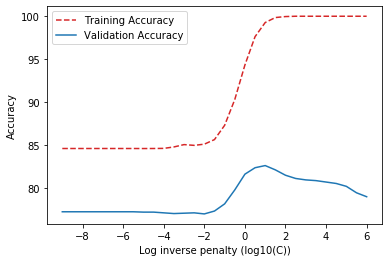

In [41]:
fig, ax = plt.subplots()
ax.plot(C_log,lgt_re.get("mean_train_score")*100, label='Training Accuracy', color="tab:red", ls='--')
ax.plot(C_log,lgt_re.get("mean_test_score")*100, label='Validation Accuracy', color="tab:blue")
plt.xlabel('Log inverse penalty (log10(C))')
plt.ylabel('Accuracy')
# plt.ylim([70, 100]);

ax.legend()
plt.show()


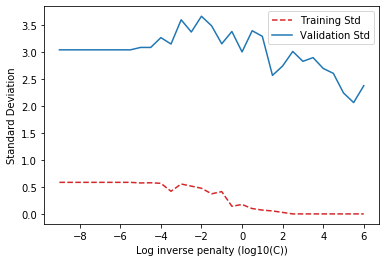

In [43]:
fig, ax = plt.subplots()
ax.plot(C_log,lgt_re.get("std_train_score")*100, label='Training Std', color="tab:red", ls='--')
ax.plot(C_log,lgt_re.get("std_test_score")*100, label='Validation Std', color="tab:blue")
plt.xlabel('Log inverse penalty (log10(C))')
plt.ylabel('Standard Deviation')
# plt.ylim([0.0, 0.7]);

ax.legend()
plt.show()


## Test FPs & FNs of logistic classifier 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train_df, test_size=0.33, random_state=42)

In [7]:
clf = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train.values.ravel())

In [8]:
yproba1_val = clf.predict_proba(X_val)[:,1]

In [28]:
ypred = [1*(item > 0.5) for item in yproba1_val.tolist()]
yval = y_val['is_positive_sentiment'].tolist()
fp = [(ypred[i] == 1)*(yval[i] == 0) for i in range(len(ypred))]
i_fp = [i for i in range(len(fp)) if fp[i] == 1]
i_fp[0:10]

[12, 36, 50, 61, 69, 80, 139, 154, 179, 180]

In [47]:
x_train_df.iloc[180,:]

website_name                                  amazon
text            Talk about USELESS customer service.
Name: 180, dtype: object

In [65]:
ypred = [1*(item > 0.5) for item in yproba1_val.tolist()]
yval = y_val['is_positive_sentiment'].tolist()
fn = [(ypred[i] == 0)*(yval[i] == 1) for i in range(len(ypred))]
i_fn = [i for i in range(len(fn)) if fn[i] == 1]
i_fn[10:20]

[76, 87, 99, 103, 121, 146, 148, 159, 170, 177]

In [79]:
x_train_df.iloc[177,:]

website_name                   amazon
text            It's A PIECE OF CRAP!
Name: 177, dtype: object

In [77]:
tr_text_list[159]

'I kept catching the cable on the seat and I had to pull the phone out to turn it on an off.'

# MLP

In [60]:
param_mlp = [
  {'alpha': np.logspace(-5, 3, 20)}
 ]


In [46]:
mlpclf = GridSearchCV(MLPClassifier(activation = 'logistic', solver='lbfgs'), param_mlp, cv=10, return_train_score=True ).fit(X_train_tfidf, y_train_df.values.ravel())

In [47]:
pd.DataFrame(mlpclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.213275,0.415759,0.002093,0.003421,1e-05,{'alpha': 1e-05},0.850000,0.850000,0.800000,0.870833,...,1.000000,1.000000,0.908333,1.000000,1.000000,1.000000,1.000000,1.000000,0.990833,0.027500
1,2.550407,0.184690,0.001120,0.000317,2.63665e-05,{'alpha': 2.6366508987303556e-05},0.841667,0.854167,0.791667,0.858333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,2.495393,0.446782,0.001137,0.000494,6.95193e-05,{'alpha': 6.951927961775606e-05},0.850000,0.854167,0.800000,0.866667,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.971759,1.000000,1.000000,0.997176,0.008472
3,2.697209,0.533512,0.000971,0.000208,0.000183298,{'alpha': 0.00018329807108324357},0.850000,0.850000,0.808333,0.837500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,2.990435,0.461298,0.001167,0.000304,0.000483293,{'alpha': 0.0004832930238571752},0.829167,0.845833,0.812500,0.829167,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,2.849141,1.305139,0.001278,0.000373,0.00127427,{'alpha': 0.0012742749857031334},0.816667,0.858333,0.754167,0.854167,...,0.892593,1.000000,0.822685,1.000000,1.000000,1.000000,0.902778,1.000000,0.961806,0.061515
6,3.763309,0.354746,0.000924,0.000088,0.00335982,{'alpha': 0.003359818286283781},0.845833,0.858333,0.800000,0.837500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,3.174533,1.059143,0.001229,0.000586,0.00885867,{'alpha': 0.008858667904100823},0.837500,0.854167,0.812500,0.845833,...,1.000000,1.000000,1.000000,0.951389,1.000000,1.000000,1.000000,1.000000,0.987546,0.025645
8,3.262441,1.132669,0.000940,0.000151,0.0233572,{'alpha': 0.023357214690901212},0.833333,0.829167,0.812500,0.837500,...,1.000000,1.000000,1.000000,1.000000,0.925000,1.000000,1.000000,0.926389,0.985139,0.029724
9,2.876824,1.321927,0.001018,0.000199,0.0615848,{'alpha': 0.06158482110660261},0.833333,0.837500,0.783333,0.791667,...,0.880093,0.872222,0.908796,1.000000,0.913426,1.000000,1.000000,1.000000,0.957454,0.053307


In [48]:
print(mlpclf.cv_results_)

{'mean_fit_time': array([2.21327507, 2.55040672, 2.49539268, 2.69720917, 2.99043512,
       2.84914072, 3.76330905, 3.17453325, 3.26244144, 2.87682388,
       2.76731894, 3.28059185, 3.28039682, 2.53517456, 2.01071827,
       0.82859204, 0.61182442, 0.59056647, 0.58240461, 0.63275096]), 'std_fit_time': array([0.41575887, 0.18468974, 0.44678222, 0.5335122 , 0.46129792,
       1.3051392 , 0.35474644, 1.05914321, 1.13266915, 1.32192678,
       1.23561034, 1.91150919, 1.23913505, 0.85683564, 0.36812976,
       0.16100253, 0.14621156, 0.17628978, 0.13874928, 0.12456294]), 'mean_score_time': array([0.00209346, 0.00111973, 0.00113697, 0.00097148, 0.00116656,
       0.00127802, 0.0009239 , 0.00122852, 0.00093989, 0.00101821,
       0.00087447, 0.00110343, 0.00093026, 0.00103471, 0.00087373,
       0.00091753, 0.00086658, 0.00087392, 0.00095475, 0.00095682]), 'std_score_time': array([3.42075566e-03, 3.17117831e-04, 4.93844844e-04, 2.08469395e-04,
       3.03562198e-04, 3.72904938e-04, 8.7800823

In [49]:
yproba1_test_mlp = mlpclf.predict(X_test_counts)

In [50]:
np.savetxt('yproba1_test3.txt', yproba1_test_mlp)

In [53]:
alpha_grid = np.logspace(-5, 3, 20)
A_log = np.log10(alpha_grid)
mlp_re = mlpclf.cv_results_

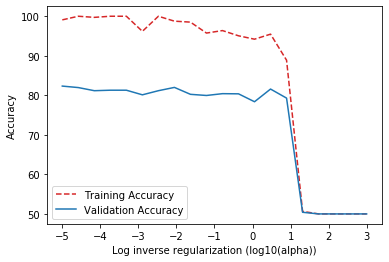

In [54]:
fig, ax = plt.subplots()
ax.plot(A_log,mlp_re.get("mean_train_score")*100, label='Training Accuracy', color="tab:red", ls='--')
ax.plot(A_log,mlp_re.get("mean_test_score")*100, label='Validation Accuracy', color="tab:blue")
plt.xlabel('Log inverse regularization (log10(alpha))')
plt.ylabel('Accuracy')
# plt.ylim([70, 100]);

ax.legend()
plt.show()


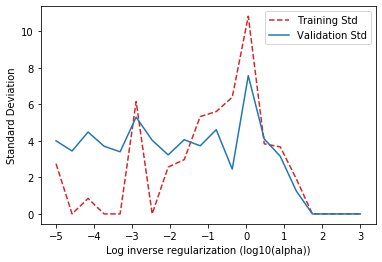

In [55]:
fig, ax = plt.subplots()
ax.plot(A_log,mlp_re.get("std_train_score")*100, label='Training Std', color="tab:red", ls='--')
ax.plot(A_log,mlp_re.get("std_test_score")*100, label='Validation Std', color="tab:blue")
plt.xlabel('Log inverse regularization (log10(alpha))')
plt.ylabel('Standard Deviation')
# plt.ylim([0.0, 0.7]);

ax.legend()
plt.show()


In [59]:
param_mlp2 = [
  {'alpha': np.logspace(-5, 3, 14)}
 ]

In [62]:
mlpclf2 = GridSearchCV(MLPClassifier(activation = 'logistic', solver='lbfgs'), param_mlp2, cv=10, return_train_score=True ).fit(X_train_tfidf, y_train_df.values.ravel())

In [63]:
yproba1_test_mlp2 = mlpclf2.predict(X_test_counts)

In [64]:
np.savetxt('yproba1_test4.txt', yproba1_test_mlp2)

In [66]:
alpha_grid2 = np.logspace(-5, 3, 14)
A_log2 = np.log10(alpha_grid2)
mlp_re2 = mlpclf2.cv_results_

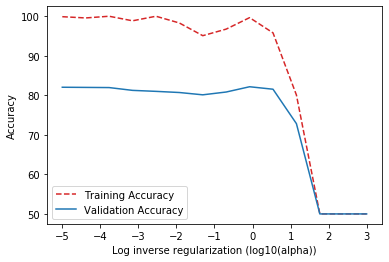

In [67]:
fig, ax = plt.subplots()
ax.plot(A_log2,mlp_re2.get("mean_train_score")*100, label='Training Accuracy', color="tab:red", ls='--')
ax.plot(A_log2,mlp_re2.get("mean_test_score")*100, label='Validation Accuracy', color="tab:blue")
plt.xlabel('Log inverse regularization (log10(alpha))')
plt.ylabel('Accuracy')
# plt.ylim([70, 100]);

ax.legend()
plt.show()


In [68]:
mlp_re2.get("mean_train_score")

array([0.99884259, 0.99569444, 1.        , 0.98847222, 1.        ,
       0.98296296, 0.95083333, 0.9674537 , 0.99648148, 0.95796296,
       0.80078704, 0.5       , 0.5       , 0.5       ])

# SVM

In [71]:
param_svm = [
  {'C': np.logspace(-2, 10, 13)}
 ]

In [73]:
svmclf = GridSearchCV(SVC(kernel='rbf', gamma = 'scale'), param_svm, cv=10, return_train_score=True ).fit(X_train_tfidf, y_train_df.values.ravel())

In [74]:
pd.DataFrame(svmclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.402851,0.011520,0.045199,0.001995,0.01,{'C': 0.01},0.629167,0.679167,0.654167,0.545833,...,0.660648,0.628241,0.630556,0.603241,0.593519,0.593981,0.611111,0.594907,0.617963,0.021476
1,0.390205,0.005747,0.045005,0.002608,0.1,{'C': 0.1},0.645833,0.691667,0.658333,0.554167,...,0.668056,0.641667,0.637500,0.612963,0.596296,0.607870,0.617130,0.606481,0.628333,0.022192
2,0.402664,0.005558,0.042630,0.004121,1,{'C': 1.0},0.829167,0.845833,0.829167,0.866667,...,0.994444,0.994444,0.993519,0.997222,0.996759,0.994444,0.995370,0.994907,0.995139,0.001061
3,0.417325,0.006927,0.041697,0.001938,10,{'C': 10.0},0.850000,0.858333,0.837500,0.866667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.418298,0.005784,0.041689,0.001849,100,{'C': 100.0},0.850000,0.858333,0.837500,0.866667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.419233,0.007061,0.041777,0.001954,1000,{'C': 1000.0},0.850000,0.858333,0.837500,0.866667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.420376,0.007271,0.041691,0.001891,10000,{'C': 10000.0},0.850000,0.858333,0.837500,0.866667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.419083,0.005082,0.041893,0.001920,100000,{'C': 100000.0},0.850000,0.858333,0.837500,0.866667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.417601,0.004927,0.042305,0.002033,1e+06,{'C': 1000000.0},0.850000,0.858333,0.837500,0.866667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.419149,0.005436,0.041979,0.002030,1e+07,{'C': 10000000.0},0.850000,0.858333,0.837500,0.866667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [75]:
yproba1_test_svm = svmclf.predict(X_test_counts)

In [77]:
np.savetxt('yproba1_test5.txt', yproba1_test_svm)

In [78]:
C_grid = np.logspace(-2, 10, 13)
C_log = np.log10(C_grid)
svm_re = svmclf.cv_results_

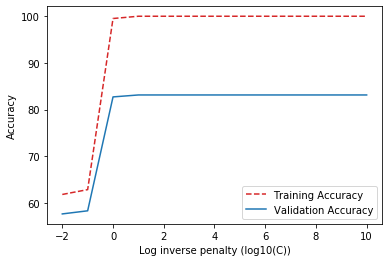

In [79]:
fig, ax = plt.subplots()
ax.plot(C_log,svm_re.get("mean_train_score")*100, label='Training Accuracy', color="tab:red", ls='--')
ax.plot(C_log,svm_re.get("mean_test_score")*100, label='Validation Accuracy', color="tab:blue")
plt.xlabel('Log inverse penalty (log10(C))')
plt.ylabel('Accuracy')
# plt.ylim([70, 100]);

ax.legend()
plt.show()


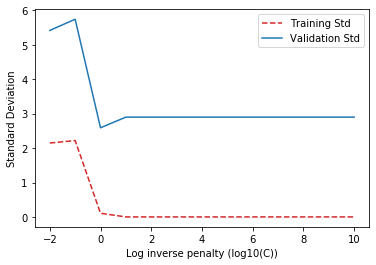

In [80]:
fig, ax = plt.subplots()
ax.plot(C_log,svm_re.get("std_train_score")*100, label='Training Std', color="tab:red", ls='--')
ax.plot(C_log,svm_re.get("std_test_score")*100, label='Validation Std', color="tab:blue")
plt.xlabel('Log inverse penalty (log10(C))')
plt.ylabel('Standard Deviation')
# plt.ylim([0.0, 0.7]);

ax.legend()
plt.show()
